In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### PLOTTING FUNCTIONS

In [13]:
# Function to plot specified variable per run
def plot_all_runs(df_list, var, color=None):
    label = var
    for df in df_list:
        df[var].plot(label=label, color=color) if color else df[var].plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

def plot_difference(df_list, var1, var2):
    label = str(var1) + " - " + str(var2)
    for df in df_list:
        diff = df[var1] - df[var2]
        diff.plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.legend()

def plot_avg_per_type(df_list, agent_type, var, color=None):
    label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].mean().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

def plot_total_per_type(df_list, agent_type, var, color=None):
    label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].sum().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

### READ DATA

#### Model variables

In [14]:
# Read all model variables to list
model_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("model"):
        df = pd.read_csv("results/" + file)
        model_vars_df_list.append(df)

# Show first dataframe
model_vars_df_list[0]

,n_agents,n_households,n_cap_firms,n_cons_firms,n_serv_firms,HH consumption,Regional demand,Export demand,Unemployment rate,Min wage,Avg wage
0,10626,10000,125,200,300,1562.115031,1562.116,0.0,0.94,0.100,0.999384
1,10626,10000,125,200,300,5601.751031,5601.751,0.0,0.89,0.500,1.035366
2,10626,10000,125,200,300,6621.406031,6621.406,0.0,0.73,0.520,1.038951
3,10626,10000,125,200,300,7617.315031,7617.316,0.0,0.54,0.520,1.042211
4,10626,10000,125,200,300,7681.520031,7681.520,0.0,0.52,0.520,1.039799
...,...,...,...,...,...,...,...,...,...,...,...
295,10626,10000,125,200,300,10083.926322,10083.926,0.0,0.05,0.515,1.033324
296,10626,10000,125,200,300,10089.029957,10089.030,0.0,0.05,0.515,1.033588
297,10626,10000,125,200,300,9955.822154,9955.823,0.0,0.07,0.515,1.033483
298,10626,10000,125,200,300,9955.039058,9955.039,0.0,0.07,0.515,1.033455


#### Agent variables

In [15]:
agent_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("agent"):
        print(file)
        df = pd.read_csv("results/" + file)
        agent_vars_df_list.append(df)

agent_vars_df_list[0]

agent_vars_0.csv


,Step,AgentID,Type,Price,Market share,Prod,Inventories,N ordered,Past demand,Real demand,Demand filled,Demand unfilled,Wage,Net worth,Size,Labor demand,Capital amount
0,1,1,<class 'CRAB_agents.CapitalFirm'>,1.244000,0.008000,1.047,1.05,0.0,1.0,0.000,0.000,0.000,1.002515,150.000000,1.0,1.0,57.0
1,1,2,<class 'CRAB_agents.CapitalFirm'>,1.213000,0.008000,1.057,1.06,0.0,1.0,0.000,0.000,0.000,0.986696,150.000000,1.0,1.0,60.0
2,1,3,<class 'CRAB_agents.CapitalFirm'>,1.252000,0.008000,1.044,1.04,0.0,1.0,0.000,0.000,0.000,1.005289,150.000000,1.0,1.0,60.0
3,1,4,<class 'CRAB_agents.CapitalFirm'>,1.246000,0.008000,1.076,1.08,0.0,1.0,0.000,0.000,0.000,1.031669,150.000000,1.0,1.0,57.0
4,1,5,<class 'CRAB_agents.CapitalFirm'>,1.181000,0.008000,1.084,1.08,0.0,1.0,0.000,0.000,0.000,0.984908,150.000000,1.0,1.0,57.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187795,300,11257,<class 'CRAB_agents.ConsumptionGoodFirm'>,1.158779,0.001107,1.048,0.00,0.0,1.0,3.199,1.048,2.151,1.012000,43.227742,1.0,1.0,8.0
3187796,300,11258,<class 'CRAB_agents.ConsumptionGoodFirm'>,1.214886,0.001107,1.048,0.00,0.0,1.0,3.199,1.048,2.151,1.061000,122.475201,1.0,1.0,8.0
3187797,300,11259,<class 'CRAB_agents.ServiceFirm'>,1.210305,0.000358,1.048,0.00,0.0,1.0,2.410,1.048,1.362,1.057000,173.470798,1.0,1.0,10.0
3187798,300,11260,<class 'CRAB_agents.ConsumptionGoodFirm'>,1.356558,0.000000,1.048,0.00,0.0,1.0,1.000,NaN,0.000,1.041000,190.292349,0.0,NaN,8.0


### SANITY CHECKS

#### N FIRMS

In [ ]:
# Plot number of firms per sector
plot_all_runs(model_vars_df_list, "n_cap_firms", color="tab:blue")
plot_all_runs(model_vars_df_list, "n_cons_firms", color="tab:orange")
plot_all_runs(model_vars_df_list, "n_serv_firms", color="tab:green")

plt.ylabel("N firms")
plt.show()

#### CONSUMPTION

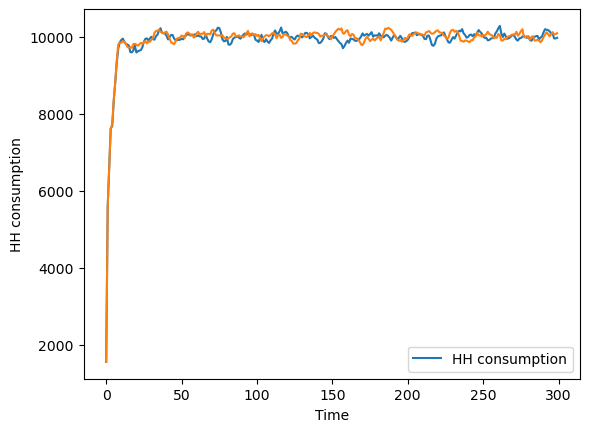

In [16]:
plot_all_runs(model_vars_df_list, "HH consumption")
# plt.ylim(4000, 5000)
plt.show()

#### REAL DEMAND

##### Regional and export demand

In [ ]:
# Plot ratio regional:export demand
plot_all_runs(model_vars_df_list, "Regional demand", color="tab:blue")
plot_all_runs(model_vars_df_list, "Export demand", color="tab:orange")
# plt.ylim(4000, 5000)
# plt.xlim(0, 50)
plt.ylabel("Demand")
plt.show()

##### Sectoral demand

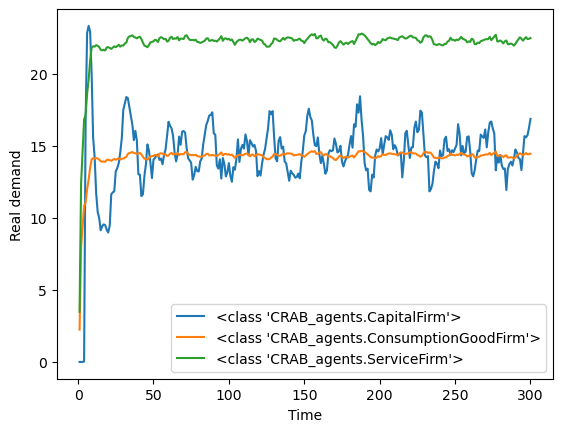

In [17]:
# Plot average demand per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Real demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Real demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Real demand", color="tab:green")
# plt.xlim(0, 50)
plt.show()

##### Inventories/demand

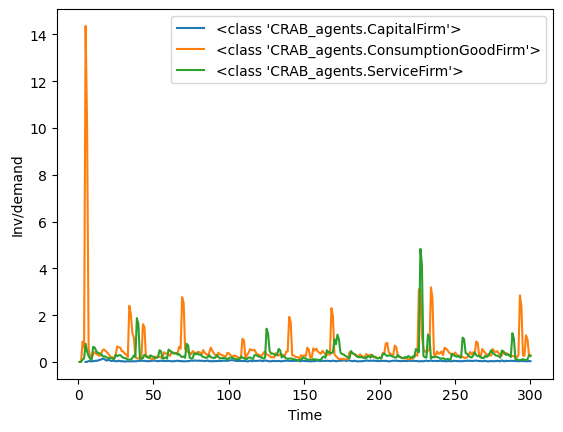

In [18]:
# Plot inventory level as fraction of demand
for i in range(len(agent_vars_df_list)):
    df = agent_vars_df_list[i]
    df["Inv/demand"] = df["Inventories"]/df["Past demand"]
    df = df.replace({np.inf: np.nan})
    agent_vars_df_list[i] = df
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inv/demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inv/demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inv/demand", color="tab:green")
plt.show()

#### LABOR

##### UNEMPLOYMENT RATE

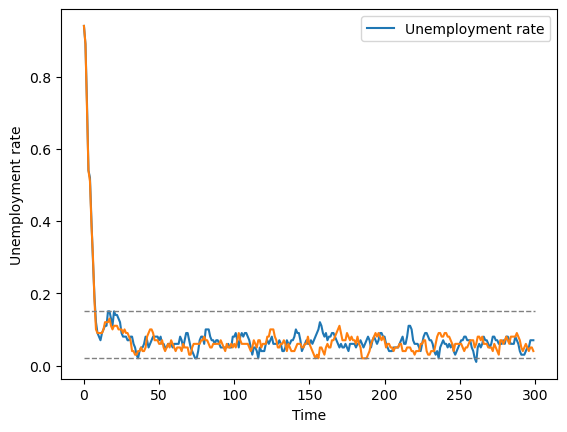

In [19]:
# Unemployment rate should vary between min 2-3 and max 10-15 percent
n_steps = len(model_vars_df_list[0])
plot_all_runs(model_vars_df_list, "Unemployment rate")
plt.hlines(y=0.02, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.hlines(y=0.15, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.show()

##### LABOR DEMAND

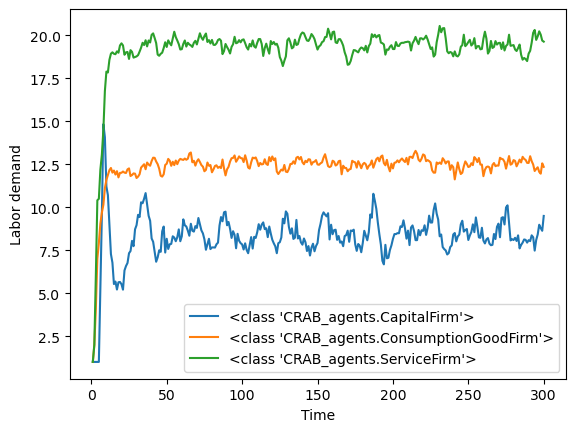

In [20]:
# Plot average labor demand per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Labor demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Labor demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Labor demand", color="tab:green")
plt.show()

##### SIZE

In [ ]:
# Plot size (n employers) for all firms (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Size", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Size", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Size", color="tab:green")
plt.show()

In [ ]:
# Plot distribution of firms sizes at end of simulation
df = agent_vars_df_list[0]

firm_size_dict = {
                  "<class 'CRAB_agents.CapitalFirm'>": (45, 125),
                  "<class 'CRAB_agents.ConsumptionGoodFirm'>": (20, 200),
                  "<class 'CRAB_agents.ServiceFirm'>": (30, 300),
                 }

for k, v in firm_size_dict.items():
    for i in np.arange(9, 400, 10):
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Size", bins=10)
        plt.title("TIMESTEP: " + str(i+1) + " " + k)
        plt.xlabel("Size")
        plt.ylim(0, v[1])
        plt.xlim(0, v[0])
        # plt.show()
        plt.savefig("results/plots/sizes/" + str(k).split(".")[-1][:-2] + "_timestep" + str(i+1))
        plt.close()

for k, v in firm_size_dict.items():
    fig, ax = plt.subplots(2, 4)
    for j, i in enumerate(np.arange(49, 400, 50)):
        a = ax[j//4][j%4]
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Size", ax=a, bins=10)
        a.set_title("Step: " + str(i+1))
        a.set_xlabel("Size")
        a.set_ylim(0, v[1])
        a.set_xlim(0, v[0])
    fig.suptitle(k.split(".")[-1][:-2])
    fig.tight_layout()
    plt.savefig("results/plots/sizes/" + str(k).split(".")[-1][:-2])

In [ ]:
# Plot distribution of firms market share at end of simulation
df = agent_vars_df_list[0]

firm_size_dict = {
                  # "<class 'CRAB_agents.CapitalFirm'>": (0.01, 150),
                  "<class 'CRAB_agents.ConsumptionGoodFirm'>": (0.02, 20),
                  "<class 'CRAB_agents.ServiceFirm'>": (0.015, 20),
                 }

for k, v in firm_size_dict.items():
    for i in np.arange(9, 400, 10):
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Market share", bins=100)
        plt.title("TIMESTEP: " + str(i+1) + " " + k)
        plt.xlabel("Market share")
        plt.ylim(0, v[1])
        plt.xlim(0, v[0])
        # plt.savefig("results/plots/MS/" + str(k).split(".")[-1][:-2] + "_timestep" + str(i+1))
        plt.close()

for k, v in firm_size_dict.items():
    fig, ax = plt.subplots(2, 4)
    for j, i in enumerate(np.arange(49, 400, 50)):
        a = ax[j//4][j%4]
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Market share", ax=a, bins=50)
        a.set_title("Step: " + str(i+1))
        a.set_xlabel("Market share")
        a.set_ylim(0, v[1])
        a.set_xlim(0, 0.002)
    fig.suptitle(k.split(".")[-1][:-2])
    fig.tight_layout()
    # plt.savefig("results/plots/MS/" + str(k).split(".")[-1][:-2])

#### MIN and AVERAGE WAGE

In [ ]:
# Plot average wage
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.show()

plot_all_runs(model_vars_df_list, "Avg wage")
plt.show()

In [ ]:
# Plot minimum wage
plot_all_runs(model_vars_df_list, "Min wage", color="tab:blue")
plt.show()

#### PRICES

In [ ]:
# Plot average prices per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Price", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Price", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Price", color="tab:green")
plt.show()

#### MARKET SHARES

In [ ]:
# Plot average market share per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Market share", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Market share", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Market share", color="tab:green")
plt.show()

#### NET WORTH

In [ ]:
# Plot average net worth per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Net worth", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Net worth", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Net worth", color="tab:green")
plt.show()

#### PRODUCTIVITY and WAGES

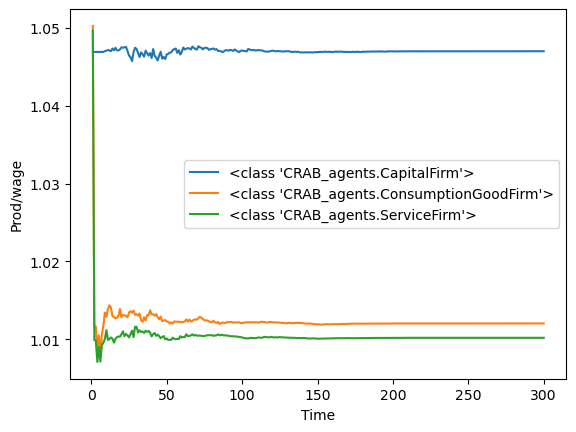

In [21]:
# Plot average ratio productivity : wage per sector
for df in agent_vars_df_list:
    df["Prod/wage"] = df["Prod"]/df["Wage"]
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod/wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod/wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod/wage", color="tab:green")
plt.show()

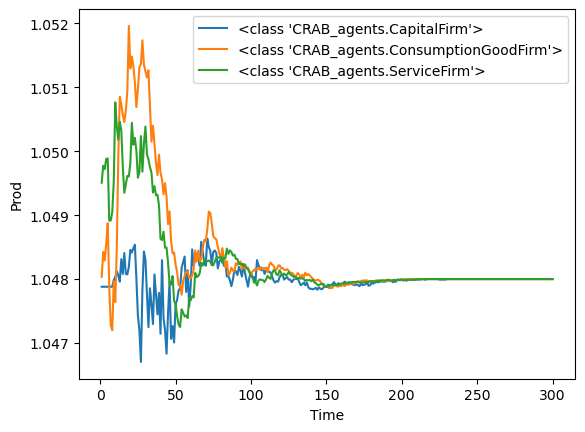

In [22]:
# Plot average productivity per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod", color="tab:green")
plt.show()

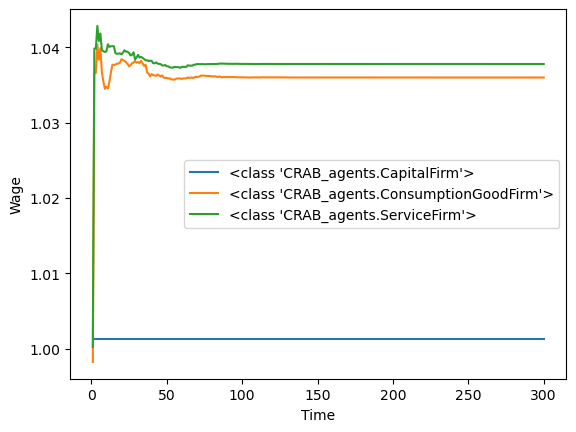

In [23]:
# Plot wages
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.show()

#### Inventories

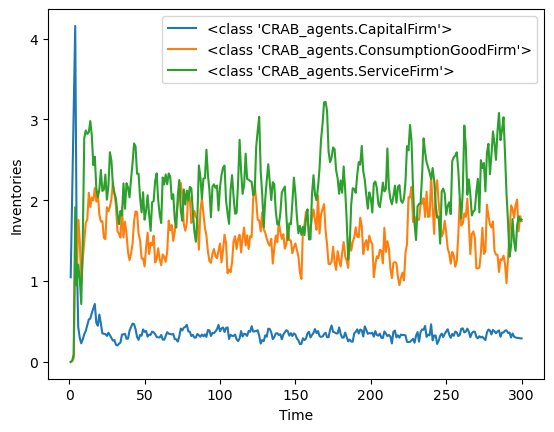

In [24]:
# Plot inventory level
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inventories", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inventories", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inventories", color="tab:green")
plt.show()

#### MACHINES

##### Capital amount

In [ ]:
# Plot difference between desired machines and ordered machines (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital amount", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital amount", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital amount", color="tab:green")
plt.show()

##### Capital desired

In [ ]:
# Plot difference between desired machines and ordered machines (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="N ordered", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="N ordered", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="N ordered", color="tab:green")
plt.show()